Sumber dataset:
[Retail Supermarket](https://www.kaggle.com/datasets/roopacalistus/superstore)

In [96]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [97]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [98]:
# Mengubah nama kolom menjadi huruf kecil
data = data.rename(columns=lambda x: x.lower())

In [99]:
# Mengubah nama kolom
data = data.rename(columns = {'ship mode' : 'ship_mode', 'postal code' : 'postal_code', 'sub-catergory' : 'sub_category'})

In [100]:
data.head()

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [101]:
data.shape

(9994, 13)

In [102]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub-category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# EDA

## Ship Mode

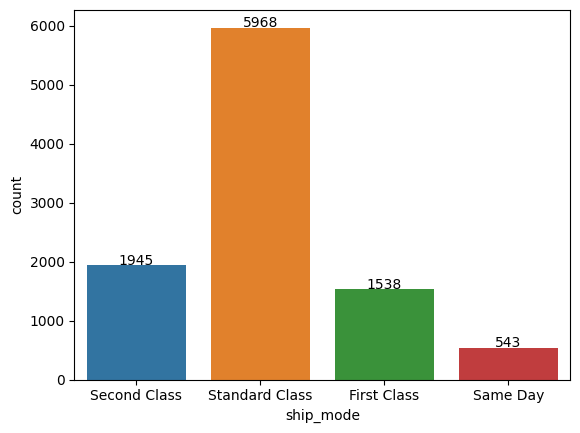

In [104]:
ax = sns.countplot(x='ship_mode', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center") 

Ship mode yang paling sering digunakan adalah Standard Class dengan jumlah 5968 dan yang paling jarang digunakan oleh costumer adalah same day, harga dari ongkos kirim yang diberikan mungkin sangat berpengaruh sehingga Standard Class lebih banyak diminati karena harga yang lebih murah dibandingkan dengan yang lainnya.

## Segment

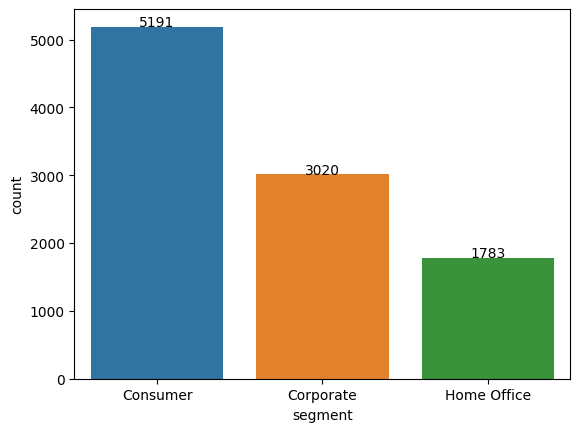

In [105]:
ax = sns.countplot(x='segment', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")

Segment yang paling banyak bertransaksi adalah Consumer dimana ada sebanyak 5191 transaksi dan Home Office memiliki jumlah transaksi terendah dengan jumlah transaksi 1783

## City

In [106]:
data.city.value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: city, Length: 531, dtype: int64

In [107]:
data.groupby(['city'])[['category']].value_counts().sort_values(ascending = False)

city           category       
New York City  Office Supplies    552
Los Angeles    Office Supplies    443
San Francisco  Office Supplies    322
Philadelphia   Office Supplies    312
Seattle        Office Supplies    249
                                 ... 
Port Arthur    Furniture            1
               Technology           1
Pompano Beach  Office Supplies      1
               Technology           1
Aberdeen       Office Supplies      1
Length: 1198, dtype: int64

In [108]:
data.groupby(['city'])[['sales']].sum().sort_values(by='sales', ascending=False)

,sales
city,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [109]:
data.groupby(['city'])[['profit']].sum().sort_values(by='profit', ascending=False)

,profit
city,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
...,...
Chicago,-6654.5688
Lancaster,-7239.0684
San Antonio,-7299.0502


Kota yang paling banyak melakukan transaksi adalah New York City dengan jumlah transaksi sebanyak 915, Los Angeles sebanyak 747 dan Philadelphia sebanyak 537, dan kategori yang paling banyak dibeli adalah Office Supplies.

pada penjualan new york city memiliki penjualan terbesar dengan jumlah sales 256368, Los Angeles 175851 dan seattle 119540.

Pendapatan terbanyak diperoleh dari new york city dengan profit sebesar 62036.9837, Los Angeles sebesar 30440.7579 dan seattle 29156.0967

Philadelphia termasuk kedalam 3 teratas dari kota yang memiliki jumlah transaksi terbanyak namun secara penjualan tidak memiliki jumlah penjualan yang terlalu banyak dan kota Philadelphia mengalammi kerugian dimana kota ini memiliki kerugian paling besar dari kota lain dengan jumlah kerugian sebesar -13837.7674

## State

In [110]:
data.groupby(['state'])[['sales']].sum().sort_values(by='sales', ascending=False)

,sales
state,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


In [111]:
data.groupby(['state'])[['profit']].sum().sort_values(by='profit', ascending=False)

,profit
state,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


dari 49 state, 3 state yang paling banyak melakukan penjualan adalah California, New York dan Texas dimana California mendapatkan total penjualan sebesar 457687.6315, New York sebesar 310876.2710 dan Texas sebesar 170188.0458, namun dari segi profit Texas mengalami kerugian sebesar -25729.3563 dimana jumlah tersebut adalah jumlah kerugian terbesar dari semua state.

## Region

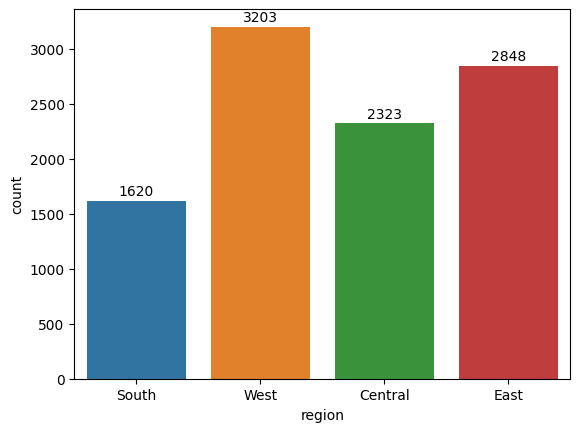

In [170]:
ax = sns.countplot(x='region', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 50, '{:1.0f}'.format(height), ha="center")
plt.show()

Region West memiliki jumlah transaksi terbanyak dengan jumlah transaksi sebanyak 3203, East sebanyak 2848, Central sebanyak 2323 dab South sebanyak 1620 dimana south adalah region yang memiliki jumlah transaksi terkecil, region west dan east memiliki jumlah transaksi terbanyak karanena merepresentasikan 3 kota dengan jumlah transaksi terbanyak yaitu New York City, Los Angeles dan Philadelphia. 

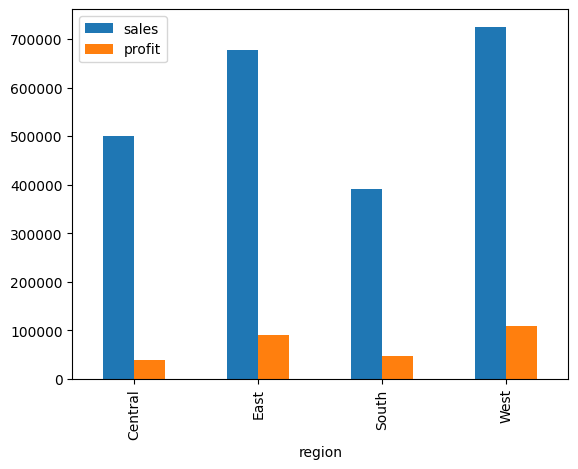

In [172]:
data.groupby('region')[['sales', 'profit']].sum().plot(kind='bar')
plt.show()

Region West dan East memiliki total penjualan yang lebih tinggi dibandingkan dengan wilayah lainnya. Selain itu, kedua wilayah tersebut juga menghasilkan keuntungan yang lebih tinggi. Hal ini menunjukkan bahwa pasar di wilayah West dan East memiliki potensi yang baik untuk perusahaan dalam hal penjualan dan profitabilitas

## Category

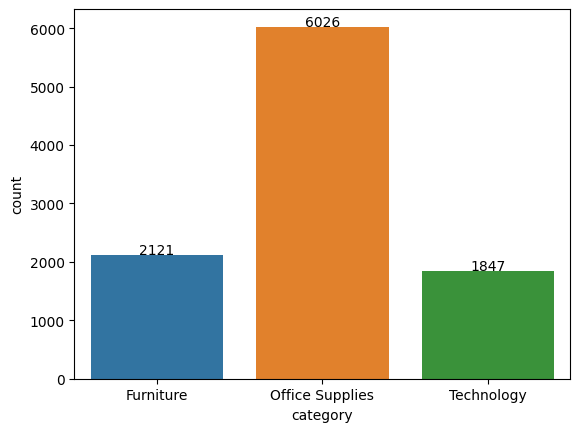

In [113]:
ax = sns.countplot(x='category', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 10, '{:1.0f}'.format(height), ha="center")

Katefori Office Supplies memiliki jumlah produk terjual paling banyak dengan jumlah 6026, hal ini disebabkan salah satunya karena 3 kota dengan jumlah transaksi terbanyak semuanya membeli produk yang berkategori office supplies

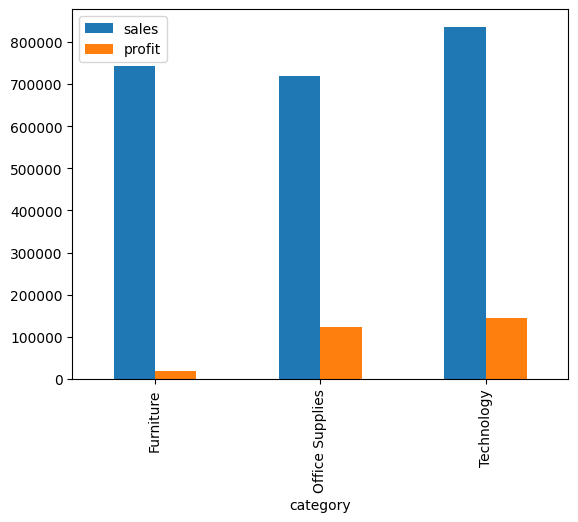

In [173]:
data.groupby('category')[['sales', 'profit']].sum().plot(kind='bar')
plt.show()

Kategori produk Technology memiliki penjualan tertinggi di antara kategori-kategori lainnya, sementara kategori Office Supplies memiliki penjualan terendah. Meskipun demikian, perbedaan jumlah penjualan antara ketiga kategori tersebut tidak terlalu signifikan.

Menariknya, meskipun total penjualan kategori Furniture lebih tinggi daripada Office Supplies, namun kategori Furniture menghasilkan profit yang sangat rendah, dengan jumlah di bawah 50000. Di sisi lain, kategori Office Supplies dan Technology menghasilkan keuntungan yang signifikan, dengan profit di atas 100000. Hal ini menunjukkan bahwa meskipun penjualan Furniture lebih tinggi, strategi profitabilitas perlu ditingkatkan dalam kategori ini untuk meningkatkan keuntungan yang dihasilkan.

## sub-category

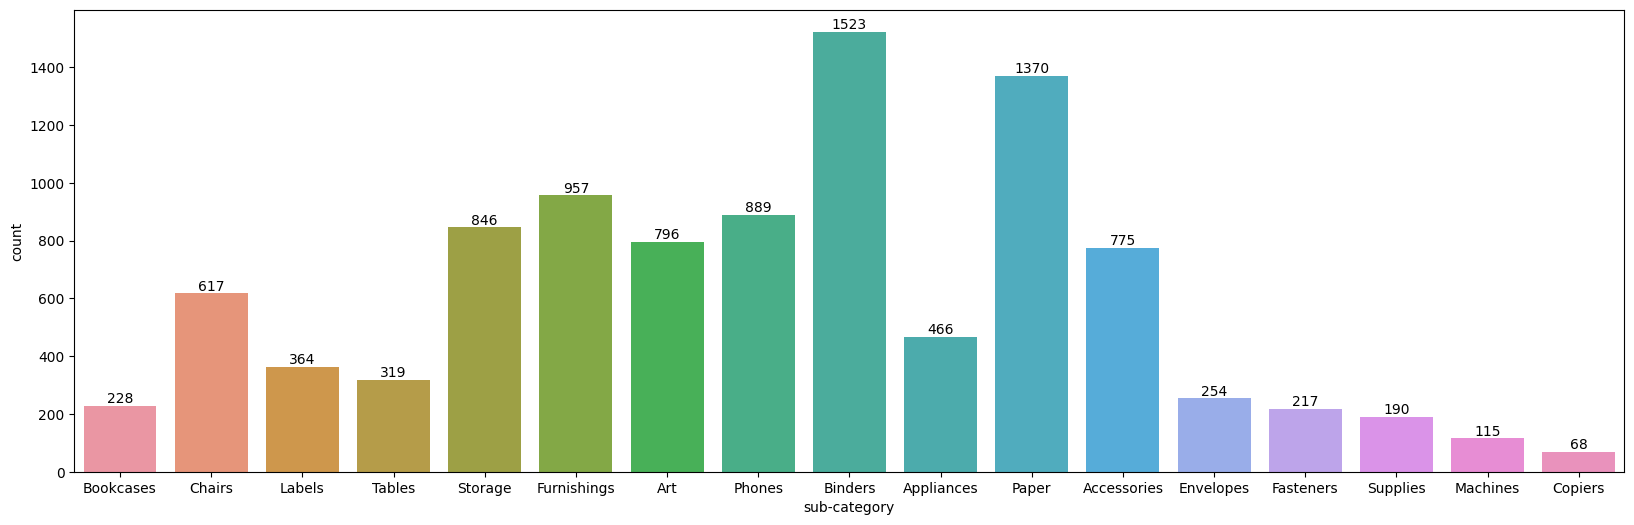

In [114]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='sub-category', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 10, '{:1.0f}'.format(height), ha="center")

Sub kategori dengan jumlah transaksi terbanyak adalah Binders dan Papers dimana jumlah transaksi dari Binders sebanyak 1523 dan Paper sebanyak 1370 dimana kedua sub kategori termasuk kategori Office Supplies

## Sales

Skewness : 12.97275234181623
Mean : 229.85800083049833
median : 54.489999999999995


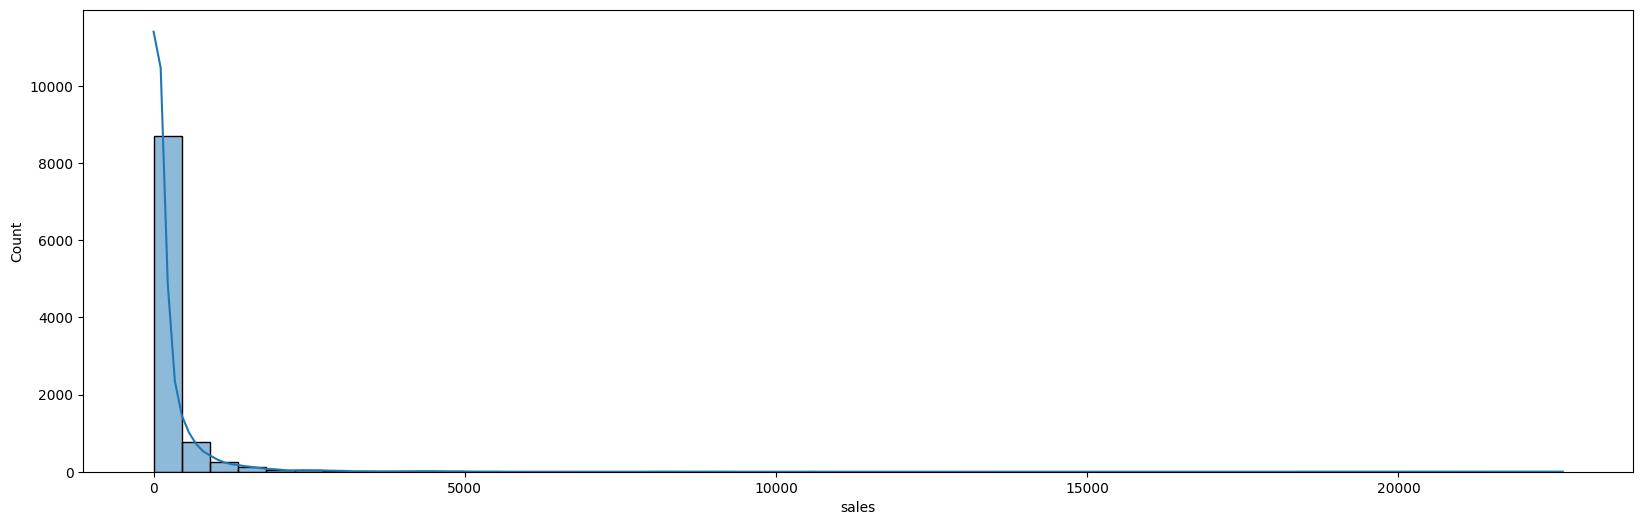

In [115]:
print(f'Skewness : {data.sales.skew()}')
print(f'Mean : {data.sales.mean()}')
print(f'median : {data.sales.median()}')

plt.figure (figsize = (20,6))
sns.histplot(data.sales, bins=50, kde=True)
plt.show()

Histogram diatas adalah distribusi dari kolom Sales dimana rata rata dari sales sebesar 230 dengan nilai minimum sebesar 0.4 dan maksimum sebesar 22638, dimana frekuensi terbanyak dari penjualan ini berkisar antara 0.4 samoai 500

## Quantity

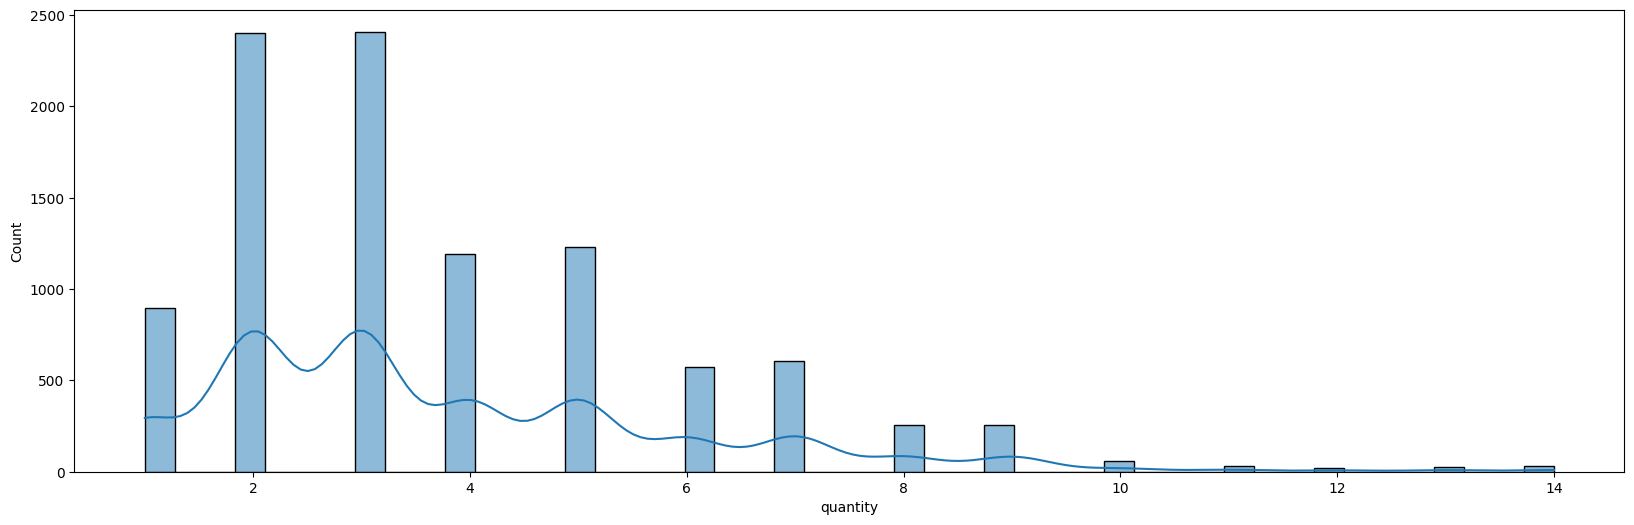

In [116]:
plt.figure (figsize = (20,6))
sns.histplot(x = 'quantity', data = data, kde = True)
plt.show()

Kebanyakan dari transaksi memiliki jumlah pembelian atau quantity sebanyak 2 sampai 3 produk dimana sangat jarang customer melakukan transaksi dengan quantity diatas 10 produk

## Discount

<Axes: xlabel='discount', ylabel='Count'>

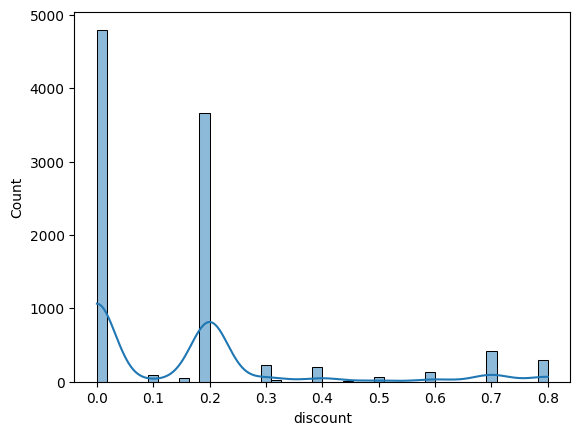

In [117]:
sns.histplot(x = 'discount', data = data, kde = True)

Perusahaan ini kebanyakan memberikan diskon sebesar 0.2 atau 20%

## Profit

Skewness : 7.561431562468343
Mean : 28.65689630778467
median : 8.6665


<Axes: xlabel='profit', ylabel='Count'>

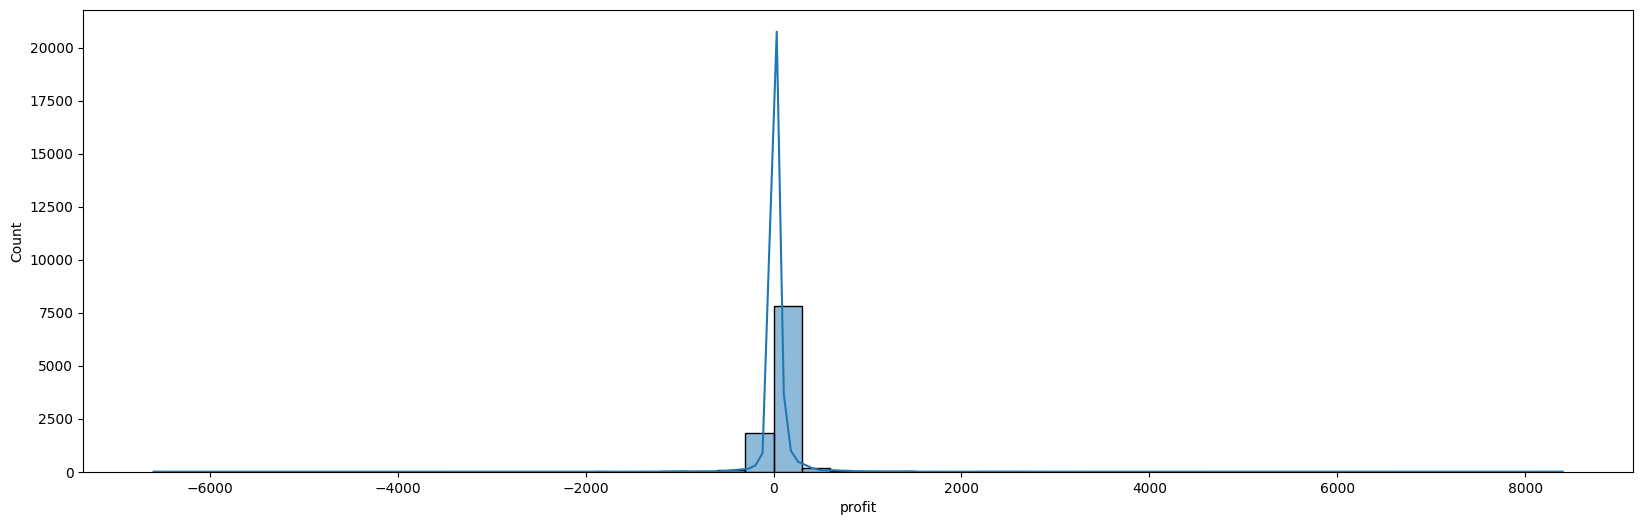

In [118]:
print(f'Skewness : {data.profit.skew()}')
print(f'Mean : {data.profit.mean()}')
print(f'median : {data.profit.median()}')
plt.figure(figsize=(20,6))
sns.histplot(x= 'profit', data = data, bins=50, kde=True)

Profit perusahaan berkisar antara 8,399 sebagai yang tertinggi hingga kerugian sebesar -6,599.978, dengan sebagian besar transaksi tidak menghasilkan profit atau memiliki profit sebesar 0.

## Apakah ada korelasi antara diskon yang diberikan dan keuntungan yang dihasilkan?

Text(0.5, 1.0, 'profit vs discount')

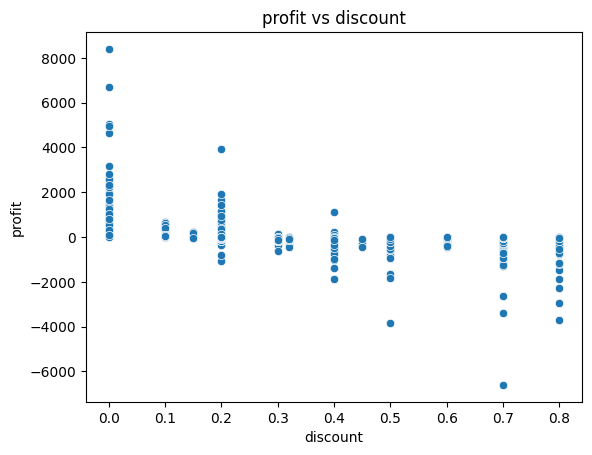

In [119]:
sns.scatterplot(x=data.discount,y=data.profit)
plt.title('profit vs discount')

terlihat dari grafik diatas bahwa adanya korelasi antara profit dan diskon dimana semakin tinggi diskon yang diberikan maka perusahaan tidak mendapatkan profit bahkan mengalami kerugian.

## Bagaimana distribusi penjualan berdasarkan kategori produk?

<Axes: xlabel='category'>

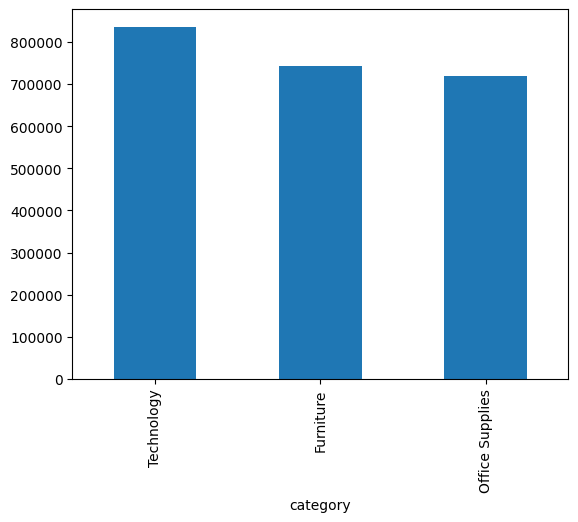

In [120]:
data.groupby('category')['sales'].sum().sort_values(ascending=False).plot(kind='bar')

kategori Technology memiliki total penjualan terbesar dan office supplies memiliki total penjualan terendah namun perbedaan dari ketiga kategori tidak terlalu signifikan

## Apakah ada perbedaan dalam jumlah penjualan antara segmentasi pelanggan 

<Axes: xlabel='segment'>

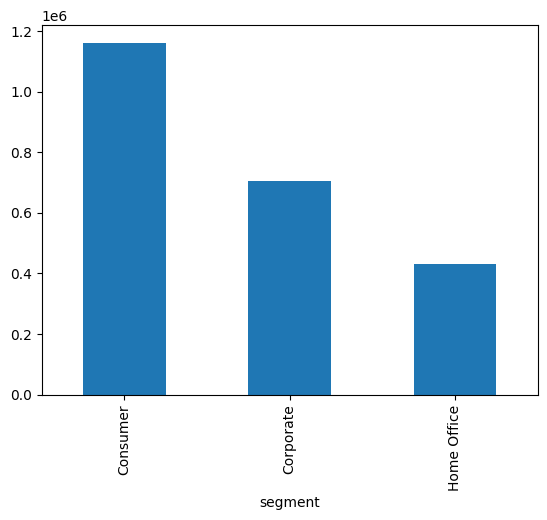

In [121]:
data.groupby('segment')['sales'].sum().sort_values(ascending=False).plot(kind='bar')

dari segmentasi pelanggan jumlah penjualan tertinggi dimiliki oleh segmen consumer lalu corporate dan paling rendah adalah Home Office

## Bagaimana perbandingan penjualan dan keuntungan antara subkategori?

C:\Users\salma\AppData\Local\Temp\ipykernel_22956\197953963.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('sub-category')['sales', 'profit'].sum().plot(kind='bar')


<Axes: xlabel='sub-category'>

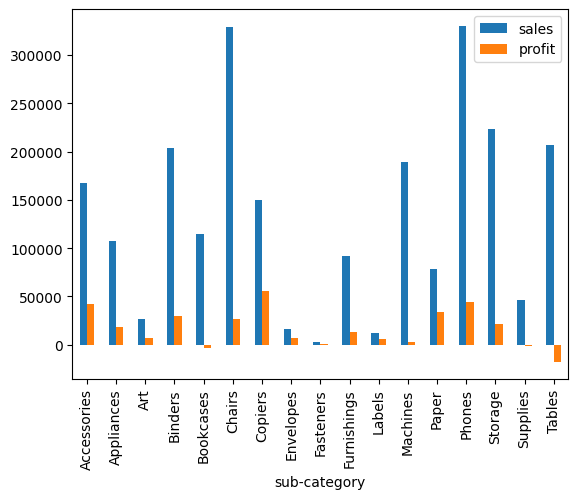

In [165]:
data.groupby('sub-category')['sales', 'profit'].sum().plot(kind='bar')

In [123]:
data[(data['sub-category'] == 'Bookcases') & (data.discount == 0)]

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
369,Same Day,Corporate,United States,Manchester,Connecticut,6040,East,Furniture,Bookcases,1043.92,4,0.0,271.4192
736,Standard Class,Home Office,United States,Seattle,Washington,98115,West,Furniture,Bookcases,84.98,1,0.0,18.6956
1302,Second Class,Home Office,United States,Arlington,Virginia,22204,South,Furniture,Bookcases,61.96,2,0.0,4.3372
1386,Same Day,Home Office,United States,Smyrna,Georgia,30080,South,Furniture,Bookcases,239.98,2,0.0,52.7956
1539,Second Class,Consumer,United States,Everett,Massachusetts,2149,East,Furniture,Bookcases,782.94,3,0.0,203.5644
1932,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Bookcases,145.74,3,0.0,23.3184
2025,First Class,Consumer,United States,Seattle,Washington,98103,West,Furniture,Bookcases,141.96,2,0.0,39.7488
2122,Second Class,Home Office,United States,Lansing,Michigan,48911,Central,Furniture,Bookcases,241.96,2,0.0,41.1332
2262,First Class,Consumer,United States,Arlington,Virginia,22204,South,Furniture,Bookcases,359.97,3,0.0,79.1934


In [124]:
data[(data['sub-category'] == 'Bookcases') & (data.discount != 0)]

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
189,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,899.1360,4,0.20,112.3920
192,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,626.3520,3,0.20,46.9764
213,Standard Class,Corporate,United States,Medina,Ohio,44256,East,Furniture,Bookcases,452.4500,5,0.50,-244.3230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9691,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Furniture,Bookcases,613.9992,3,0.32,-18.0588
9769,Standard Class,Home Office,United States,Hialeah,Florida,33012,South,Furniture,Bookcases,339.9200,5,0.20,8.4980
9787,Standard Class,Consumer,United States,Houston,Texas,77070,Central,Furniture,Bookcases,1023.3320,5,0.32,-30.0980
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960


In [125]:
data[(data['sub-category'] == 'Tables') & (data.discount == 0)]

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.63,3,0.0,240.2649
117,Standard Class,Consumer,United States,Seattle,Washington,98103,West,Furniture,Tables,787.53,3,0.0,165.3813
226,Standard Class,Corporate,United States,Detroit,Michigan,48227,Central,Furniture,Tables,622.45,5,0.0,136.9390
522,First Class,Corporate,United States,Detroit,Michigan,48234,Central,Furniture,Tables,210.98,2,0.0,21.0980
721,Standard Class,Corporate,United States,Detroit,Michigan,48205,Central,Furniture,Tables,1652.94,3,0.0,231.4116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,Standard Class,Corporate,United States,Broken Arrow,Oklahoma,74012,Central,Furniture,Tables,1592.85,7,0.0,350.4270
9637,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Furniture,Tables,730.20,4,0.0,94.9260
9756,Second Class,Consumer,United States,Richmond,Virginia,23223,South,Furniture,Tables,292.10,2,0.0,58.4200
9857,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Furniture,Tables,3393.68,8,0.0,610.8624


In [126]:
data[(data['sub-category'] == 'Tables') & (data.discount != 0)]

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
125,Standard Class,Consumer,United States,Bloomington,Illinois,61701,Central,Furniture,Tables,617.7000,6,0.50,-407.6820
201,First Class,Consumer,United States,Denver,Colorado,80219,West,Furniture,Tables,218.7500,2,0.50,-161.8750
231,Standard Class,Home Office,United States,Tampa,Florida,33614,South,Furniture,Tables,233.8600,2,0.45,-102.0480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,Same Day,Consumer,United States,Los Angeles,California,90008,West,Furniture,Tables,364.0800,2,0.20,9.1020
9746,Same Day,Consumer,United States,Los Angeles,California,90008,West,Furniture,Tables,71.0880,2,0.20,-1.7772
9899,Standard Class,Home Office,United States,Springfield,Ohio,45503,East,Furniture,Tables,330.5880,1,0.40,-143.2548
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


total sales tertinggi terdapat pada sub kategori Phones dan Charis dimana Phones memiliki total penjualan sebesar 330007 dengan profit sebesar 44515 dan Chairs memiliki total penjualan sebesar 328449 dengan profit sebesar 26590, namun profit tertinggi terdapat pada sub kategori Copiers dengan profit sebesar 55617 dengan total sales sebesar 149528, terlihat juga bahwa sub kategori Tables dan Bookcases mengalami kerugian dimana Tables mengalami kerugian sebesar -17725 dan Bookcases mengalami kerugian sebesar -3472, kerugian ini disebabkan karena banyaknya diskon yang diberikan pada subkategori tersebut.

# Data Preprocessing

## Drop Columns

In [ ]:
# Menghapus data yang tidak digunakan
data = data.drop(columns=['postal_code','country','city','state'])

penghapusan pada kolom diatas dilakukan karena kolom diatas sudah di representasikan oleh kolom region

## Splitting Data

Data dibagi menjadi 2 yaitu data train dan data test dimana saya membagi data menjadi train memiliki 80% dari total data dan data test 20% dari total data

In [128]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=1)

In [129]:
print(f'df_train proportion: {len(df_train) / len(data):.1f}')
print(f'df_test proportion: {len(df_test) / len(data):.1f}')

df_train proportion: 0.8
df_test proportion: 0.2


In [131]:
# Splitting numerical column dan categorical columns
num_columns = df_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = df_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['sales', 'quantity', 'discount', 'profit']
Categorical Columns :  ['ship_mode', 'segment', 'region', 'category', 'sub-category']


In [132]:
# Memasukan kolom numerikal dan kategorikan kedalam variabel baru
df_train_num = df_train[num_columns]
df_test_num = df_test[num_columns]

df_train_cat = df_train[cat_columns]
df_test_cat = df_test[cat_columns]

## Data Scaling

In [133]:
# Definisi scaler dan fit scaler
scaler = RobustScaler()
scaler.fit(df_train_num)

RobustScaler()

In [134]:
# Membuat variabel baru untuk data yang sudah di scaling
df_train_num_scaled = scaler.transform(df_train_num)
df_test_num_scaled = scaler.transform(df_test_num)

## Data Encoding

In [135]:
# Definisi encoder dan fit encoder
encoder = OneHotEncoder()
encoder.fit(df_train_cat)

OneHotEncoder()

In [136]:
# Membuat variabel baru untuk data yang sudah di Encode
df_train_cat_encoded = encoder.transform(df_train_cat)
df_test_cat_encoded = encoder.transform(df_test_cat)

In [137]:
# Convert data yang sudah di encode ke array
df_train_cat_encoded = df_train_cat_encoded.toarray()
df_test_cat_encoded = df_test_cat_encoded.toarray() 

In [138]:
df_train_cat_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
# Menggabungkan data yang sudah di scale dan encode
df_train_final = np.concatenate([df_train_num_scaled, df_train_cat_encoded], axis=1)
df_test_final = np.concatenate([df_test_num_scaled, df_test_cat_encoded], axis=1)
df_train_final

array([[ 0.03625857, -0.33333333, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56588089, -0.66666667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.53814618, -0.33333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.21610931, -0.33333333, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.76492705,  0.66666667, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.89994386,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [140]:
# Mengubah data dari array menjadi dataframe
df_train_final = pd.DataFrame(df_train_final)
df_test_final = pd.DataFrame(df_test_final)

## PCA

In [141]:
# Untuk Visualisasi data dalam 2 dimensi
pca_2d=PCA(n_components=2, random_state=27)
vis=pca_2d.fit_transform(df_train_final)

In [142]:
# Melakukan PCA dengan 8 komponen pada data latihan
pca = PCA(n_components=8).fit(df_train_final)
# Menghitung jumlah kumulatif dari rasio varian yang dijelaskan oleh komponen PCA
cumsum = np.cumsum(pca.explained_variance_ratio_)

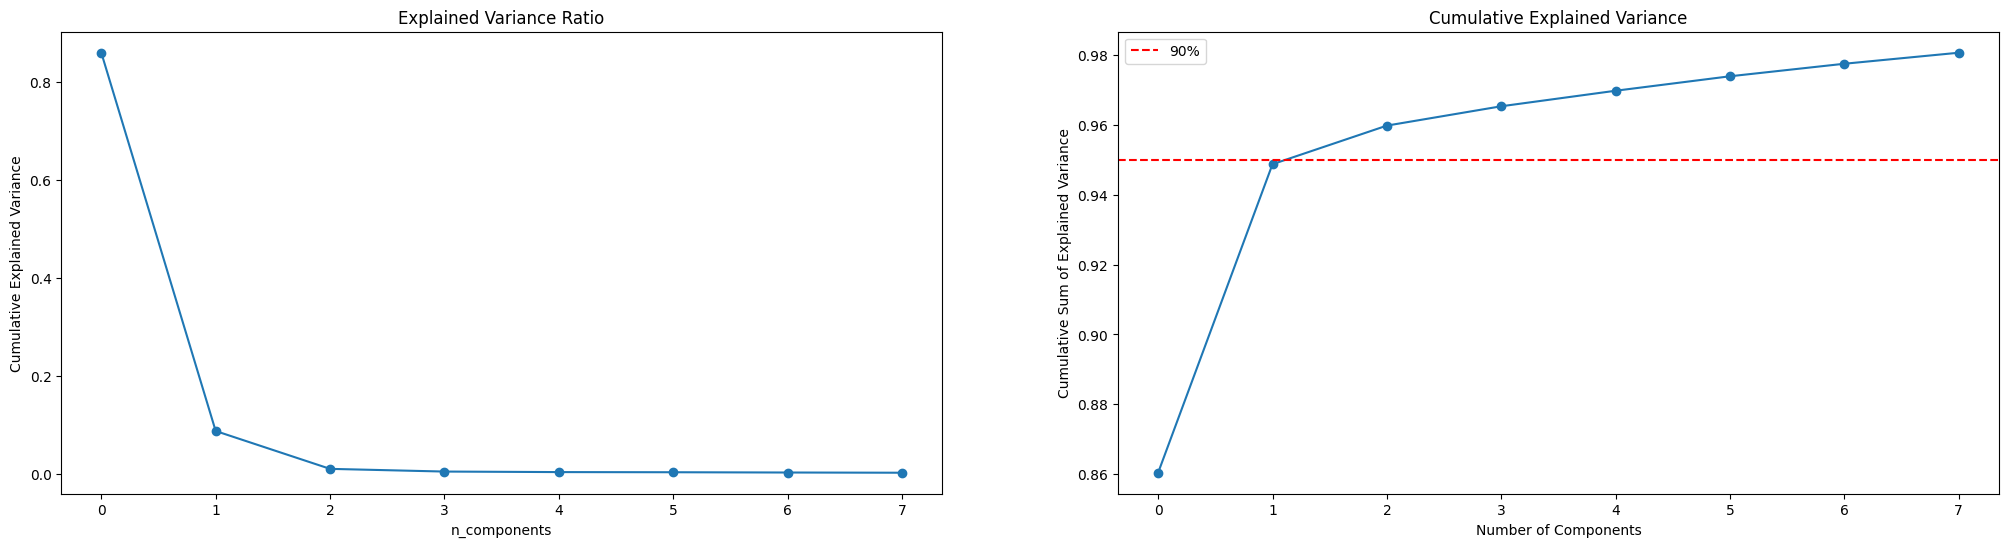

Number of components: 2
Explained variance: 0.959740314137088


In [163]:
# Membuat plot untuk cumulative variance dan variance ratio
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.subplot(1, 2, 2)
plt.plot(cumsum, marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()
print(f'Number of components: {np.argmax(cumsum >= 0.95)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.95)]}')

In [ ]:
# Mencari score siluet
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(df_train_final, KMeans(n_clusters=i, random_state=27).fit(df_train_final).labels_), 3)]

In [146]:
# Menampilkan score siluet
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
0,2.0,0.958
1,3.0,0.927
2,4.0,0.838
4,6.0,0.715
5,7.0,0.706
6,8.0,0.706
3,5.0,0.695
8,10.0,0.539
7,9.0,0.528


# Model Definition

In [ ]:
# Menginisialisasi model K-Means clustering dengan 2 klaster dan nilai random_state=27
kmeans = KMeans(n_clusters=2, random_state=27)
# Melakukan clustering pada df_train_final dan memperoleh prediksi klaster untuk setiap data
df_pred = kmeans.fit_predict(df_train_final)

In [149]:
# Membuat kolom baru yang diisi dari hasil prediksi
df_train_final['CLUSTER'] = df_pred

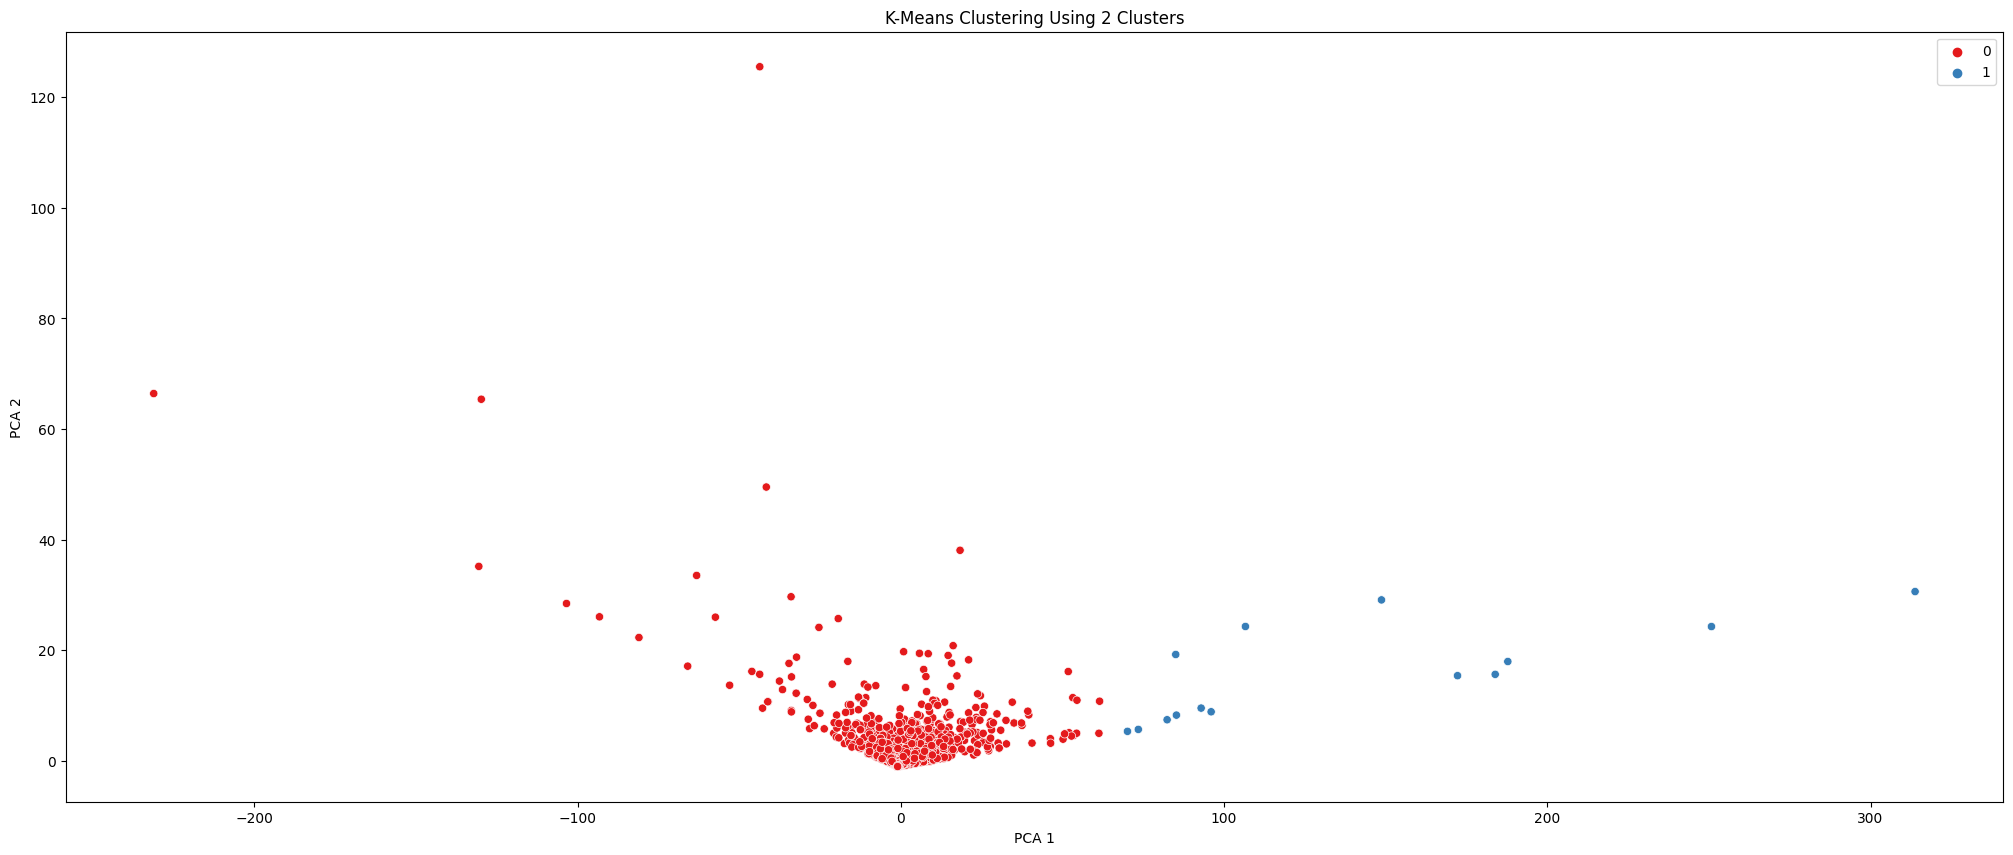

In [150]:
# Membuat plot sebaran cluster
plt.figure(figsize=(25, 10))
sns.scatterplot(x=vis[:,0], y=vis[:, 1], hue=df_pred, data=df_train_final, palette='Set1')
plt.title('K-Means Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [151]:
# Menambah kolom CLUSTER untuk hasil clustering
df_train['CLUSTER'] = df_pred
df_train[df_train.CLUSTER == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,7981.0,217.453134,520.231901,0.444,17.3400,54.8160,210.6800,22638.480
quantity,7981.0,3.769077,2.210915,1.000,2.0000,3.0000,5.0000,14.000
discount,7981.0,0.155541,0.205209,0.000,0.0000,0.2000,0.2000,0.800
profit,7981.0,22.327956,173.825717,-6599.978,1.6762,8.7052,29.1375,1668.205
CLUSTER,7981.0,0.000000,0.000000,0.000,0.0000,0.0000,0.0000,0.000


In [152]:
df_train[df_train.CLUSTER == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,14.0,8320.357000,4079.144941,3812.970,5024.925000,7874.9550,10348.162500,17499.950
quantity,14.0,5.142857,2.851643,2.000,4.000000,4.0000,5.000000,13.000
discount,14.0,0.014286,0.053452,0.000,0.000000,0.0000,0.000000,0.200
profit,14.0,3730.528029,1986.402230,1906.485,2255.732175,2695.9704,4867.396375,8399.976
CLUSTER,14.0,1.000000,0.000000,1.000,1.000000,1.0000,1.000000,1.000


# Data Testing

In [153]:
df_test.head()

,ship_mode,segment,region,category,sub-category,sales,quantity,discount,profit
1814,Standard Class,Corporate,West,Furniture,Tables,170.136,3,0.2,-8.5068
881,Standard Class,Consumer,South,Office Supplies,Storage,30.840,2,0.0,8.3268
1122,Standard Class,Consumer,South,Office Supplies,Art,22.960,7,0.0,6.6584
6807,Standard Class,Corporate,Central,Office Supplies,Paper,98.376,3,0.2,35.6613
2911,Standard Class,Consumer,East,Office Supplies,Envelopes,41.400,5,0.0,19.4580


In [154]:
df_test.shape

(1999, 9)

In [155]:
# Untuk Visualisasi data adlam 2 dimensi
pca_2d_inf=PCA(n_components=2, random_state=27)
vis_inf=pca_2d_inf.fit_transform(df_test_final)

In [156]:
# Reduksi dimensi dengan PCA
pca_inf = PCA(n_components=8).fit(df_test_final)
inf_red = pd.DataFrame(pca_inf.fit_transform(df_test_final))
inf_red

,0,1,2,3,4,5,6,7
0,-1.353092,0.210236,-0.000755,-0.384530,0.347300,-1.015570,-0.541350,-0.638493
1,-0.939068,-0.908567,0.715497,-0.353886,-0.149130,0.894310,-0.493576,0.069141
2,-0.987465,-0.823203,0.647461,1.247019,-0.498715,0.503190,-0.396045,0.184257
3,0.067365,-0.734645,-0.328531,-0.009562,0.944758,-0.059610,-0.478859,0.182931
4,-0.523270,-0.889222,0.679976,0.497409,-0.454161,0.598883,-0.365638,0.763654
...,...,...,...,...,...,...,...,...
1994,-1.102571,-0.830608,0.807375,-0.675307,0.224605,-1.102358,-0.563451,0.137882
1995,-1.041286,-0.483449,-0.202521,1.256334,0.694094,-0.382626,-0.445651,-0.480777
1996,-0.510558,-0.794994,0.763355,2.194266,-0.528300,0.291647,1.007659,-0.590995
1997,-1.156027,-0.943580,0.775708,-0.188833,-0.204882,0.765145,0.604135,0.675050


In [ ]:
pred_inf = kmeans.fit_predict(inf_red)

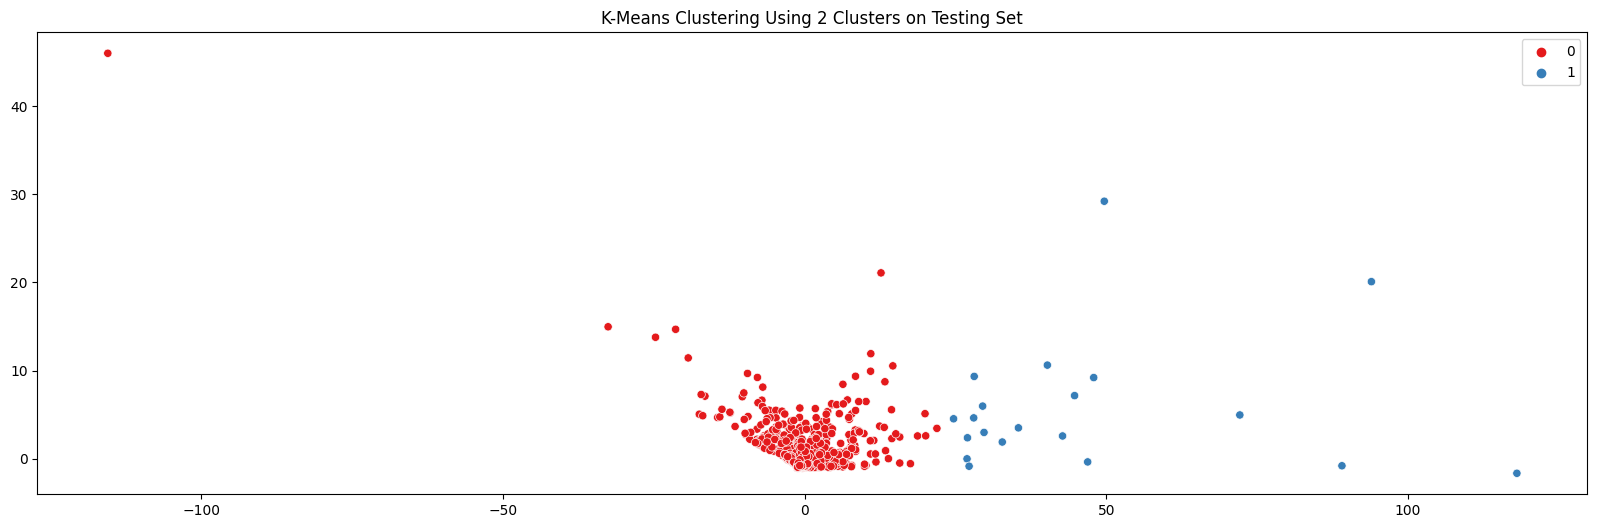

In [158]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=vis_inf[:,0], y=vis_inf[:,1], hue=pred_inf, data=df_test, palette='Set1')
plt.title('K-Means Clustering Using 2 Clusters on Testing Set')
plt.show()

In [159]:
df_test['Cluster'] = pred_inf

In [160]:
df_test.head()

,ship_mode,segment,region,category,sub-category,sales,quantity,discount,profit,Cluster
1814,Standard Class,Corporate,West,Furniture,Tables,170.136,3,0.2,-8.5068,0
881,Standard Class,Consumer,South,Office Supplies,Storage,30.840,2,0.0,8.3268,0
1122,Standard Class,Consumer,South,Office Supplies,Art,22.960,7,0.0,6.6584,0
6807,Standard Class,Corporate,Central,Office Supplies,Paper,98.376,3,0.2,35.6613,0
2911,Standard Class,Consumer,East,Office Supplies,Envelopes,41.400,5,0.0,19.4580,0


In [161]:
df_test[df_test.Cluster == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,1979.0,186.063368,347.929759,0.556,16.71400,50.454,193.8300,4912.590
quantity,1979.0,3.841839,2.268336,1.000,2.00000,3.000,5.0000,14.000
discount,1979.0,0.160748,0.212248,0.000,0.00000,0.200,0.2000,0.800
profit,1979.0,15.908115,114.022373,-3399.980,1.91125,7.980,28.6137,582.232
Cluster,1979.0,0.000000,0.000000,0.000,0.00000,0.000,0.0000,0.000


In [162]:
df_test[df_test.Cluster == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,20.0,3850.14970,2085.141649,1577.940,2403.8000,2995.15300,4636.5900,9099.930
quantity,20.0,5.85000,1.871532,3.000,4.7500,6.00000,7.0000,9.000
discount,20.0,0.07000,0.117429,0.000,0.0000,0.00000,0.2000,0.400
profit,20.0,1224.40279,694.800666,647.892,753.7164,977.97135,1240.2558,3177.475
Cluster,20.0,1.00000,0.000000,1.000,1.0000,1.00000,1.0000,1.000


Karakteristik yang paling menonjol dari kedua cluster adalah cluster 0 memiliki kecenderungan membeli produk dengan menggunakan diskon sedangkan cluster 1 tidak terlalu mementingkan diskon untuk membeli produk

dari sisi perusahaan karakteristik cluster 0 bisa berdampak buruk bagi perusahaan karena diskon dapat membuat perusahaan mengalami kerugian sehingga perlu dilakukan beberapa perubahan seperti mengurangi diskon atau bahakan menghilangkan diskon untuk beberapa produk seperti table dan bookcases yang membuat perusahaan rugi.